In [157]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
import mplcursors
import warnings
warnings.filterwarnings('ignore')

In [158]:
plt.rcParams['font.family']='Malgun Gothic'

In [159]:
#데이터 불러오기
raw_welfare = pd.read_spss('C:/Koweps_hpda18_2023_beta1.sav')
#데이터 불러오기
raw_welfare_19 = pd.read_spss('C:/Koweps_hpwc14_2019_beta2.sav')
#복사본 만들기
welfare = raw_welfare.copy()
#복사본 만들기
welfare_19 = raw_welfare_19.copy()

In [160]:
#데이터 검토
#welfare           # 앞부분, 뒷부분 확인
#welfare.shape     # 행, 열의 개수
#welfare.info()    # 열의 속성
#welfare.describe() # 요약통계

In [161]:
# 분석에 필요한 열을 결정 // 열 이름 변경
welfare = welfare.rename(
    columns= {'h18_g3' : 'sex',                # 성별
              'h18_g4' : 'birth',              # 태어난 년도
              'h18_g10' : 'marriage_type',    # 혼인 상태
              'h18_g11' : 'religion',          # 종교
              'p1802_8aq1' : 'income',         # 월급
              'h18_eco9' : 'code_job',         # 직업 코드
              'h18_reg7' : 'code_region',      # 지역 코드
              'h18_eco4' : 'eW' ,              # 주된 경제활동 참여상태
              'h18_eco11': 'no_eW',              #비경제활동사유
              'h18_g8' : 'disabled_type', #장애종류
              'h18_med3' : 'hospital_year', #1년간 의료기간 이용 외래진료횟수
              'h18_soc_5' : 'pension_status' #국민연급 납부여부    
                              
              })    


In [162]:
welfare_19 = welfare_19.rename(
    columns= {'h14_g3' : 'sex',                # 성별
              'h14_g4' : 'birth',              # 태어난 년도
              'h14_g10' : 'marriage_type',    # 혼인 상태
              'h14_g11' : 'religion',          # 종교
              'p1402_8aq1' : 'income',         # 월급
              'h14_eco9' : 'code_job',         # 직업 코드
              'h14_reg7' : 'code_region',       # 지역 코드
              'h14_eco4' : 'eW' ,              # 주된 경제활동 참여상태
              'h14_eco11' : 'no_eW',       # 비경제활동사유
              'h14_g8' : 'disabled_type', #장애종류
              'h14_med3' : 'hospital_year', #1년간 의료기간 이용 외래진료횟수
              'h14_soc_5' : 'pension_status', #국민연급 납부여부  
              })  

In [163]:
welfare = welfare.assign(age = 2019 - welfare['birth']+1 )
welfare['age'].describe()

count    15931.000000
mean        50.575984
std         24.226765
min         -2.000000
25%         32.000000
50%         55.000000
75%         71.000000
max        114.000000
Name: age, dtype: float64

In [164]:
welfare_19 = welfare_19.assign(age = 2019 - welfare['birth']+1 )
welfare_19['age'].describe()

count    14418.000000
mean        49.821889
std         24.318288
min         -2.000000
25%         31.000000
50%         53.000000
75%         71.000000
max        114.000000
Name: age, dtype: float64

In [165]:
#연령대에 따른 입금 차이
#초년층 : 30세 미만, 중년층 : 30~59세 , 노년층 : 60세 이상

#나이 변수 확인

welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [166]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle','old')))
welfare['ageg'].value_counts()

ageg
old       6914
middle    5339
young     3678
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

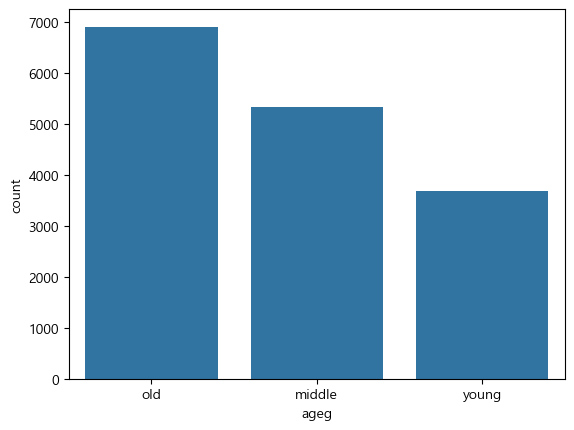

In [167]:
# 빈도 그래프
sns.countplot(data=welfare, x= 'ageg')

### 연령대 별 취업률과 실업률 비율 

In [168]:
welfare['eW'].describe()

count    14422.000000
mean         5.621620
std          3.330262
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max          9.000000
Name: eW, dtype: float64

In [169]:
welfare['eW'].dtype
welfare['eW'].value_counts() # 빈도수 

eW
9.0    6042
1.0    2757
2.0    1880
6.0    1627
4.0     746
7.0     544
3.0     477
5.0     199
8.0     150
Name: count, dtype: int64

In [170]:
#이상치 결측 처리 

welfare['eW']=np.where(welfare['eW'] == 99, np.nan, welfare['eW'])


# 결측 확인
print("결측 확인:", welfare['eW'].isna().sum()) 
welfare['eW'].isna().sum()

결측 확인: 1509


1509

In [171]:
welfare=welfare.dropna(subset=['eW'])

In [172]:
welfare = welfare.assign(ewg = np.where(welfare['eW'] <= 7, '취업률',
                               np.where(welfare['eW'] == 8, '실업률','비경제')))
welfare['ewg'].value_counts()

ewg
취업률    8230
비경제    6042
실업률     150
Name: count, dtype: int64

In [173]:
n_Employment =welfare.groupby('ewg',as_index=False)\
                 .agg(n= ('ewg','count'))
n_Employment

,ewg,n
0,비경제,6042
1,실업률,150
2,취업률,8230


<Axes: xlabel='ewg', ylabel='n'>

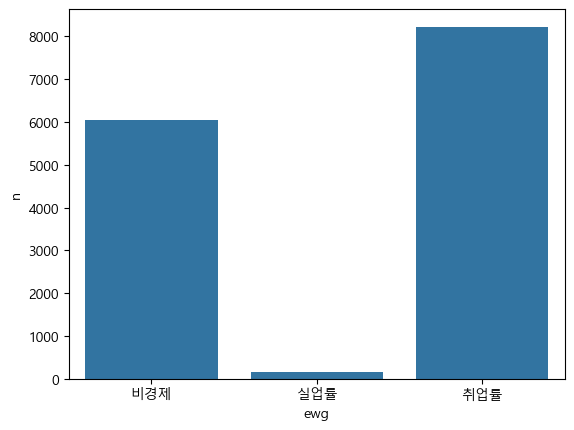

In [174]:
sns.barplot(data = n_Employment, x='ewg', y='n')


In [175]:
age_eW = welfare.groupby('ageg',as_index=False)\
                 ['ewg']\
                 .value_counts(normalize=True)
age_eW

,ageg,ewg,proportion
0,middle,취업률,0.785728
1,middle,비경제,0.199663
2,middle,실업률,0.014609
3,old,비경제,0.555395
4,old,취업률,0.440989
5,old,실업률,0.003616
6,young,비경제,0.523744
7,young,취업률,0.454587
8,young,실업률,0.021669


<Axes: xlabel='proportion', ylabel='ewg'>

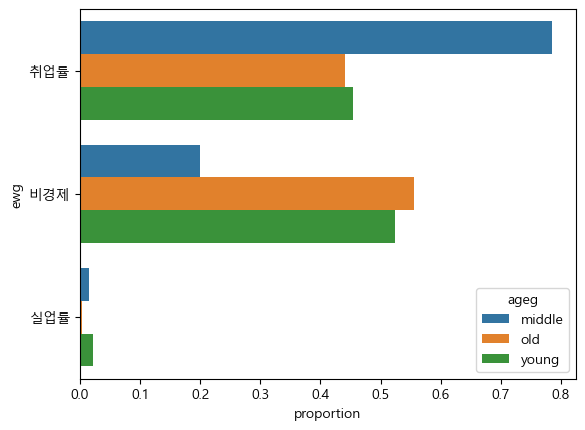

In [176]:
sns.barplot(data=age_eW, y='ewg', x='proportion',hue='ageg')


In [177]:
pivot_df=\
    age_eW[['ewg','ageg','proportion']].pivot(index='ewg',
                                              columns='ageg',
                                              values='proportion')
pivot_df

ageg,middle,old,young
ewg,,,
비경제,0.199663,0.555395,0.523744
실업률,0.014609,0.003616,0.021669
취업률,0.785728,0.440989,0.454587


<Axes: ylabel='ewg'>

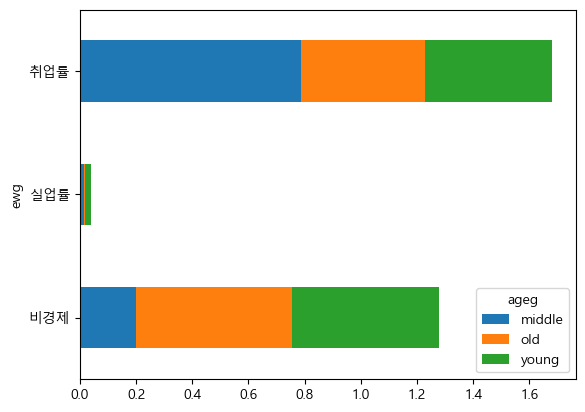

In [178]:
pivot_df.plot.barh(stacked=True)

In [179]:
welfare['no_eW'].dtype
welfare['no_eW'].value_counts() # 빈도수 

no_eW
10.0    3649
3.0      788
6.0      755
9.0      234
5.0      185
1.0      154
7.0      144
4.0       51
8.0       39
2.0       28
11.0      15
Name: count, dtype: int64

In [180]:
#이상치 결측 처리 

welfare['no_eW']=np.where(welfare['no_eW'] == 99, np.nan, welfare['no_eW'])


# 결측 확인
print("결측 확인:", welfare['no_eW'].isna().sum()) 
welfare['no_eW'].isna().sum()

결측 확인: 8380


8380

In [181]:
welfare=welfare.dropna(subset=['no_eW'])

[23년도] '성별' 항목 결측치 확인 및 대체

In [182]:
welfare['sex'].value_counts()

sex
2.0    3953
1.0    2089
Name: count, dtype: int64

In [183]:
# 결측확인
welfare['sex'].isna().sum()

0

In [184]:
# 성별, 항목 이름 부여
welfare['sex']=np.where(welfare['sex']==1,'male','female')

# 빈도 구하기
welfare['sex'].value_counts() # 빈도수

sex
female    3953
male      2089
Name: count, dtype: int64

[23년도] '장애종류'와 '외래진료 횟수' 항목 결측치 확인 및 대체 및 제거

In [185]:
welfare['disabled_type'].isna().sum()

0

In [186]:
welfare['disabled_type'].value_counts()

disabled_type
0.0     5043
1.0      434
4.0      162
2.0      104
3.0      102
6.0       67
9.0       40
8.0       35
16.0      23
7.0        6
11.0       6
15.0       5
14.0       5
5.0        5
10.0       2
12.0       2
13.0       1
Name: count, dtype: int64

In [187]:
# 0:비장애인, 1:지체장애, 2:뇌병변장애, 3:시각장애, 4:청각장애 5~: 그 외

welfare['disabled']=np.where(welfare['disabled_type']==0, '비장애인',
                           np.where(welfare['disabled_type']==1,'지체장애',
                                    np.where(welfare['disabled_type']==2,'뇌병변장애',
                                             np.where(welfare['disabled_type']==3,'시각장애',
                                                      np.where(welfare['disabled_type']==4,'청각장애','그 외')))))

welfare['disabled'].head(10)

0     비장애인
5     비장애인
6     비장애인
7     비장애인
10    비장애인
11    비장애인
12    비장애인
16    비장애인
18    비장애인
20    지체장애
Name: disabled, dtype: object

In [188]:
welfare['hospital_year'].isna().sum()

0

In [189]:
# 외래진료횟수 150회 이상은 결측치로 처리
welfare['hospital_year']=np.where(welfare['hospital_year']>=150,np.nan,welfare['hospital_year'])

In [190]:
# 결측치 제거
welfare = welfare.dropna(subset=['hospital_year'])

[23년도] 장애종류에 따른 평균 외래진료 횟수

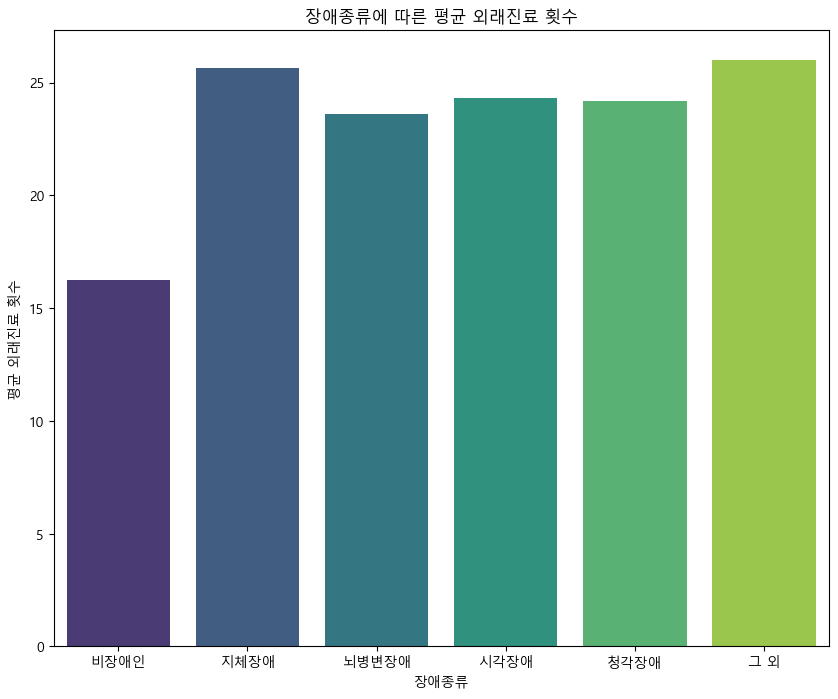

In [191]:
# 'disabled' 열의 각 범주별로 'hospital_year' 평균 계산
average_hospital_visits = welfare.groupby('disabled')['hospital_year'].mean().reset_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 8))
sns.barplot(data=average_hospital_visits, x='disabled', y='hospital_year', palette='viridis', order=['비장애인','지체장애','뇌병변장애','시각장애','청각장애','그 외'])
plt.title('장애종류에 따른 평균 외래진료 횟수')
plt.xlabel('장애종류')
plt.ylabel('평균 외래진료 횟수')
plt.xticks(rotation=0)  # x축 레이블을 읽기 쉽게 회전
plt.show()

[23년도] '급여' 항목 결측치 확인 및 대체 및 제거

In [192]:
# 이상치는 결측 처리
welfare['income']=np.where(welfare['income']>=9500, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

5957

In [193]:
# 장애종류별 급여 평균
dis_income=welfare.dropna(subset=['income'])\
                  .groupby('disabled',as_index=False)\
                  .agg(mean_income=('income','mean'))
dis_income

,disabled,mean_income


[23년도] 장애종류별 평균 급여

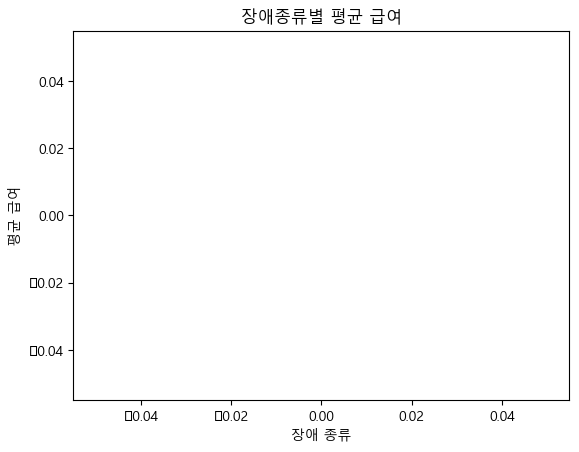

In [194]:
# 'disabled' 컬럼을 범주형으로 변환하고 순서 지정
dis_income['disabled'] = pd.Categorical(dis_income['disabled'], 
                                       categories=['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외'],
                                       ordered=True)

# 데이터 정렬
dis_income = dis_income.sort_values('disabled')


# 선 그래프 그리기
sns.lineplot(data=dis_income, x='disabled', y='mean_income', marker='h', color='red')
plt.title("장애종류별 평균 급여")
plt.xlabel('장애 종류')
plt.ylabel('평균 급여')
plt.xticks(rotation=0) # x축 범주들 글자 각도 조정, 필요에 따라 조절
plt.show()

[23년도] 장애인 취업률 구하기

In [195]:
welfare['eW'].isna().sum()

0

In [196]:
welfare = welfare.dropna(subset=['eW'])

eW가 9만 남아있어서 아래 그래프에서 모두 비근로자로 표시되는 오류 발생 /
위쪽에서 eW 사용할 때 오류가 있었던 듯

In [197]:
welfare['eW'].value_counts()

eW
9.0    5957
Name: count, dtype: int64

In [198]:
welfare['eW'] = np.where((welfare['eW'] == 8) | (welfare['eW'] == 9), '비근로자', '근로자')

In [199]:
welfare['eW'].value_counts('1')

eW
비근로자    1.0
Name: proportion, dtype: float64

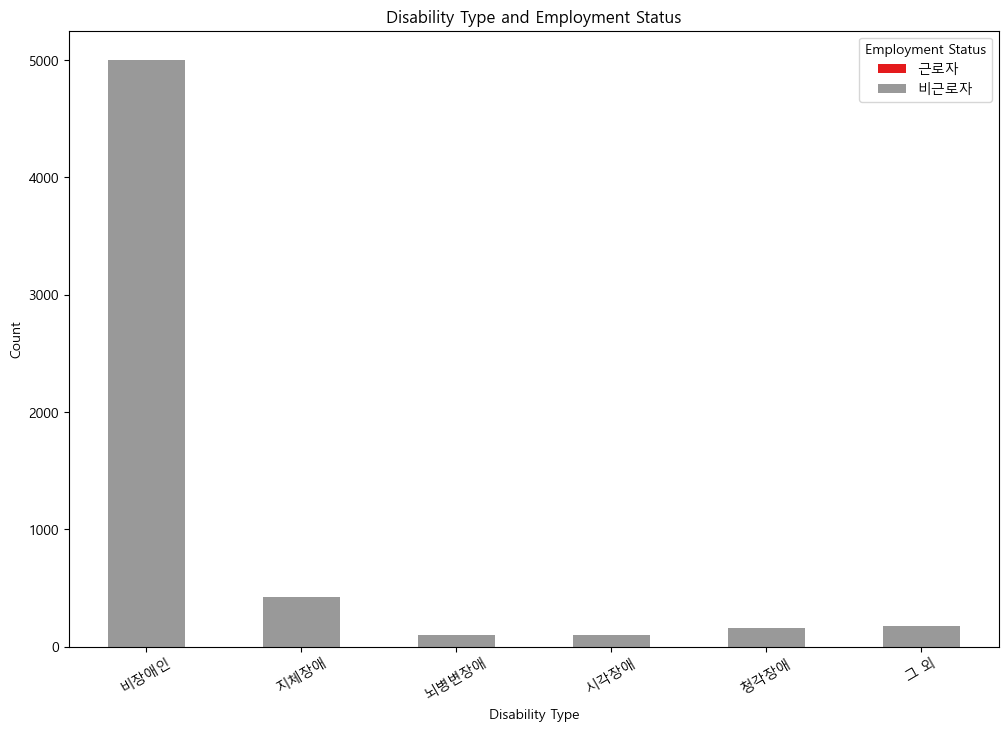

In [200]:
# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare['disabled'] = pd.Categorical(welfare['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='Set1', ax=plt.gca())

# 제목 및 축 레이블 설정
plt.title('Disability Type and Employment Status')
plt.xlabel('Disability Type')
plt.ylabel('Count')

# x축 레이블 설정
plt.xticks(ticks=range(len(grouped_data.index)), labels=grouped_data.index, rotation=30)

# 범례 설정
plt.legend(title='Employment Status')

# 그래프 표시
plt.show()

In [201]:

# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare['disabled'] = pd.Categorical(welfare['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 비장애인 제외
filtered_data = grouped_data.drop(index='비장애인')

# 비장애인을 제외한 나머지 범주의 총 수
total_counts_excluding_non_disabled = filtered_data.sum().sum()

# 비장애인을 제외한 나머지 범주에서 근로자의 총 수
total_employed_excluding_non_disabled = filtered_data['근로자'].sum()

# 비율 계산
employment_percentage = (total_employed_excluding_non_disabled / total_counts_excluding_non_disabled) * 100

# 결과 출력
print(f'장애인 중에서 근로자 비율: {employment_percentage:.2f}%')
print(f'장애인 중에서 비근로자 비율: {100-employment_percentage:.2f}%')

장애인 중에서 근로자 비율: 0.00%
장애인 중에서 비근로자 비율: 100.00%


2019년

In [202]:
welfare_19['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [203]:
# 결측확인
welfare_19['sex'].isna().sum()

0

In [204]:
# 성별, 항목 이름 부여
welfare_19['sex']=np.where(welfare_19['sex']==1,'male','female')

# 빈도 구하기
welfare_19['sex'].value_counts() # 빈도수

sex
female    7913
male      6505
Name: count, dtype: int64

'장애종류'와 '외래진료 횟수' 항목 결측치 확인 및 대체 및 제거


In [205]:
welfare_19['disabled_type'].isna().sum()

0

In [206]:
welfare_19['disabled_type'].value_counts()

disabled_type
0.0     13068
1.0       661
4.0       161
3.0       140
2.0       118
6.0        94
16.0       47
9.0        42
8.0        36
7.0        10
14.0       10
11.0        8
5.0         7
15.0        5
10.0        5
12.0        5
13.0        1
Name: count, dtype: int64

In [207]:
# 0:비장애인, 1:지체장애, 2:뇌병변장애, 3:시각장애, 4:청각장애 5~: 그 외

welfare_19['disabled']=np.where(welfare_19['disabled_type']==0, '비장애인',
                           np.where(welfare_19['disabled_type']==1,'지체장애',
                                    np.where(welfare_19['disabled_type']==2,'뇌병변장애',
                                             np.where(welfare_19['disabled_type']==3,'시각장애',
                                                      np.where(welfare_19['disabled_type']==4,'청각장애','그 외')))))

welfare_19['disabled'].head(10)

0    비장애인
1    비장애인
2    비장애인
3    비장애인
4    비장애인
5    비장애인
6    비장애인
7    비장애인
8    지체장애
9    비장애인
Name: disabled, dtype: object

In [208]:
welfare_19['hospital_year'].isna().sum()

2

In [209]:
# 외래진료횟수 150회 이상은 결측치로 처리
welfare_19['hospital_year']=np.where(welfare_19['hospital_year']>=150,np.nan,welfare_19['hospital_year'])

In [210]:
# 결측치 제거
welfare_19 = welfare_19.dropna(subset=['hospital_year'])

장애종류에 따른 평균 외래진료 횟수

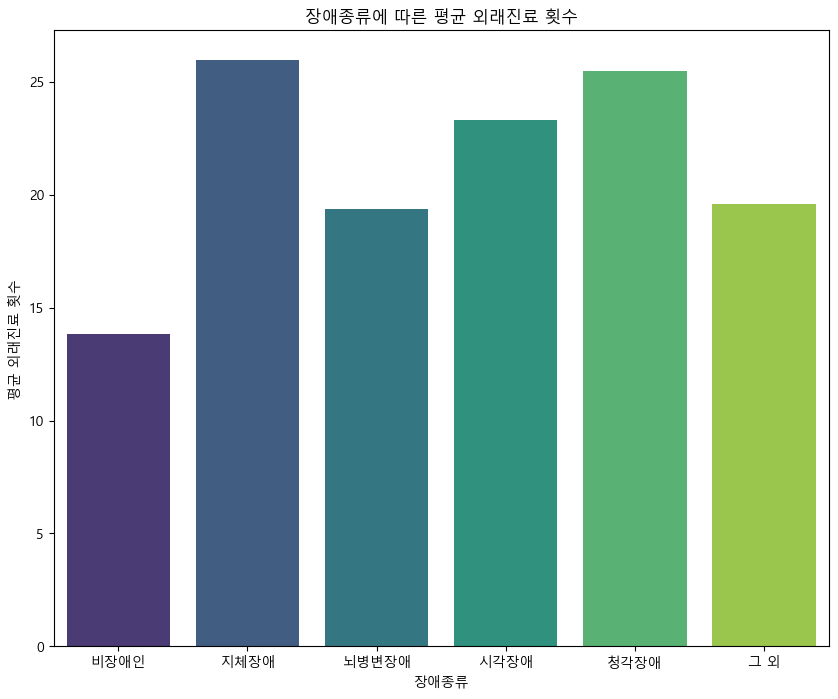

In [211]:
# 'disabled' 열의 각 범주별로 'hospital_year' 평균 계산
average_hospital_visits = welfare_19.groupby('disabled')['hospital_year'].mean().reset_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 8))
sns.barplot(data=average_hospital_visits, x='disabled', y='hospital_year', palette='viridis', order=['비장애인','지체장애','뇌병변장애','시각장애','청각장애','그 외'])
plt.title('장애종류에 따른 평균 외래진료 횟수')
plt.xlabel('장애종류')
plt.ylabel('평균 외래진료 횟수')
plt.xticks(rotation=0)  # x축 레이블을 읽기 쉽게 회전
plt.show()

'급여' 항목 결측치 확인 및 대체 및 제거


In [212]:
# 이상치는 결측 처리
welfare_19['income']=np.where(welfare_19['income']>=9500, np.nan, welfare_19['income'])

# 결측치 확인
welfare_19['income'].isna().sum()

9785

In [213]:
# 장애종류별 급여 평균
dis_income=welfare_19.dropna(subset=['income'])\
                  .groupby('disabled',as_index=False)\
                  .agg(mean_income=('income','mean'))
dis_income

,disabled,mean_income
0,그 외,200.863636
1,뇌병변장애,208.142857
2,비장애인,273.312282
3,시각장애,132.321429
4,지체장애,194.457627
5,청각장애,167.461538


장애종류별 평균 급여

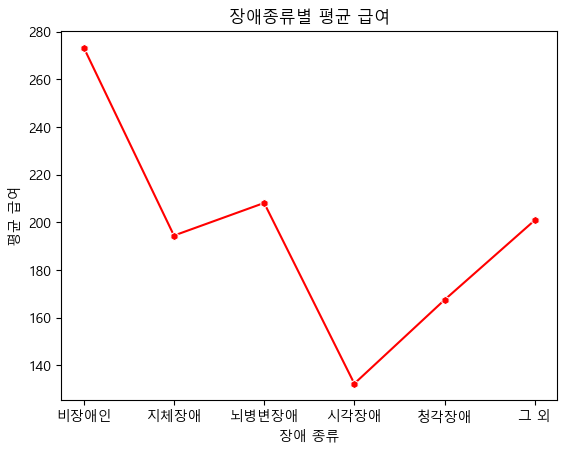

In [214]:
# 'disabled' 컬럼을 범주형으로 변환하고 순서 지정
dis_income['disabled'] = pd.Categorical(dis_income['disabled'], 
                                       categories=['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외'],
                                       ordered=True)

# 데이터 정렬
dis_income = dis_income.sort_values('disabled')


# 선 그래프 그리기
sns.lineplot(data=dis_income, x='disabled', y='mean_income', marker='h', color='red')
plt.title("장애종류별 평균 급여")
plt.xlabel('장애 종류')
plt.ylabel('평균 급여')
plt.xticks(rotation=0) # x축 범주들 글자 각도 조정, 필요에 따라 조절
plt.show()

In [215]:
welfare_19['eW'].isna().sum()

1653

In [216]:
welfare_19 = welfare_19.dropna(subset=['eW'])

In [217]:
welfare_19['eW'].value_counts()

eW
9.0    5651
1.0    2476
2.0    1542
6.0    1308
3.0     517
7.0     430
4.0     346
5.0     224
8.0     155
Name: count, dtype: int64

In [218]:
welfare_19['eW'] = np.where((welfare_19['eW'] == 8) | (welfare_19['eW'] == 9), '비근로자', '근로자')

In [219]:
welfare_19['eW'].value_counts('1')

eW
근로자     0.540991
비근로자    0.459009
Name: proportion, dtype: float64

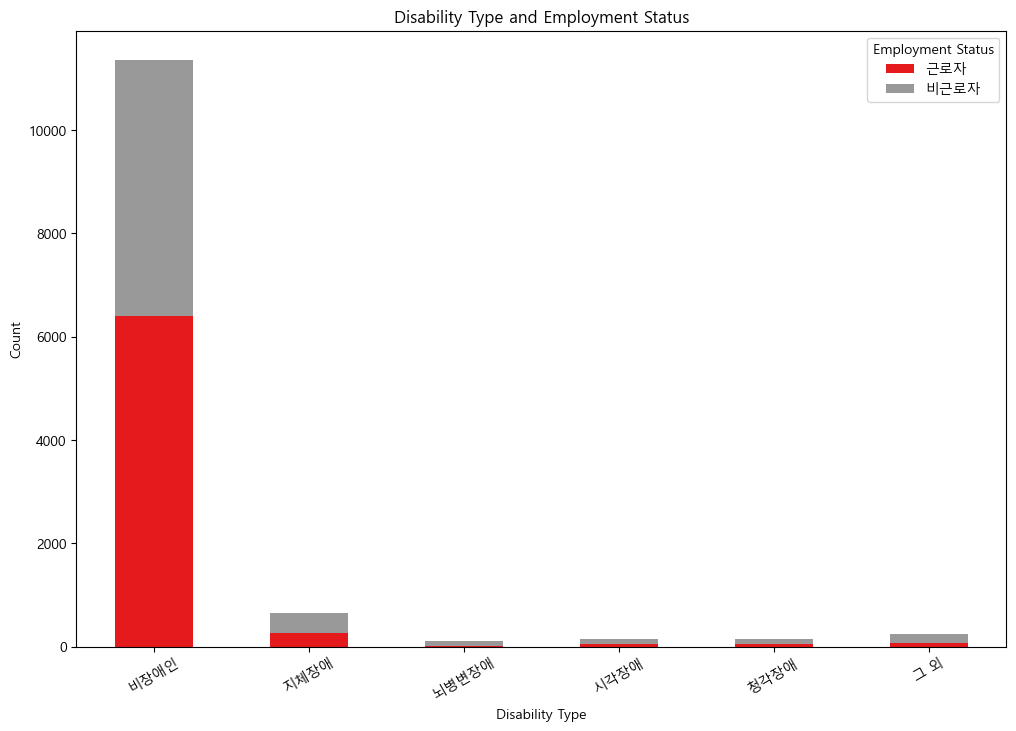

In [220]:
# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare_19['disabled'] = pd.Categorical(welfare_19['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare_19.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='Set1', ax=plt.gca())

# 제목 및 축 레이블 설정
plt.title('Disability Type and Employment Status')
plt.xlabel('Disability Type')
plt.ylabel('Count')

# x축 레이블 설정
plt.xticks(ticks=range(len(grouped_data.index)), labels=grouped_data.index, rotation=30)

# 범례 설정
plt.legend(title='Employment Status')

# 그래프 표시
plt.show()

In [221]:

# 장애 종류의 순서를 지정하여 데이터 정렬
order = ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']
welfare_19['disabled'] = pd.Categorical(welfare_19['disabled'], categories=order, ordered=True)

# 데이터 그룹화 및 집계
grouped_data = welfare_19.groupby(['disabled', 'eW']).size().unstack().reindex(columns=['근로자', '비근로자'], fill_value=0)

# 비장애인 제외
filtered_data = grouped_data.drop(index='비장애인')

# 비장애인을 제외한 나머지 범주의 총 수
total_counts_excluding_non_disabled = filtered_data.sum().sum()

# 비장애인을 제외한 나머지 범주에서 근로자의 총 수
total_employed_excluding_non_disabled = filtered_data['근로자'].sum()

# 비율 계산
employment_percentage = (total_employed_excluding_non_disabled / total_counts_excluding_non_disabled) * 100

# 결과 출력
print(f'장애인 중에서 근로자 비율: {employment_percentage:.2f}%')
print(f'장애인 중에서 비근로자 비율: {100-employment_percentage:.2f}%')

장애인 중에서 근로자 비율: 33.77%
장애인 중에서 비근로자 비율: 66.23%


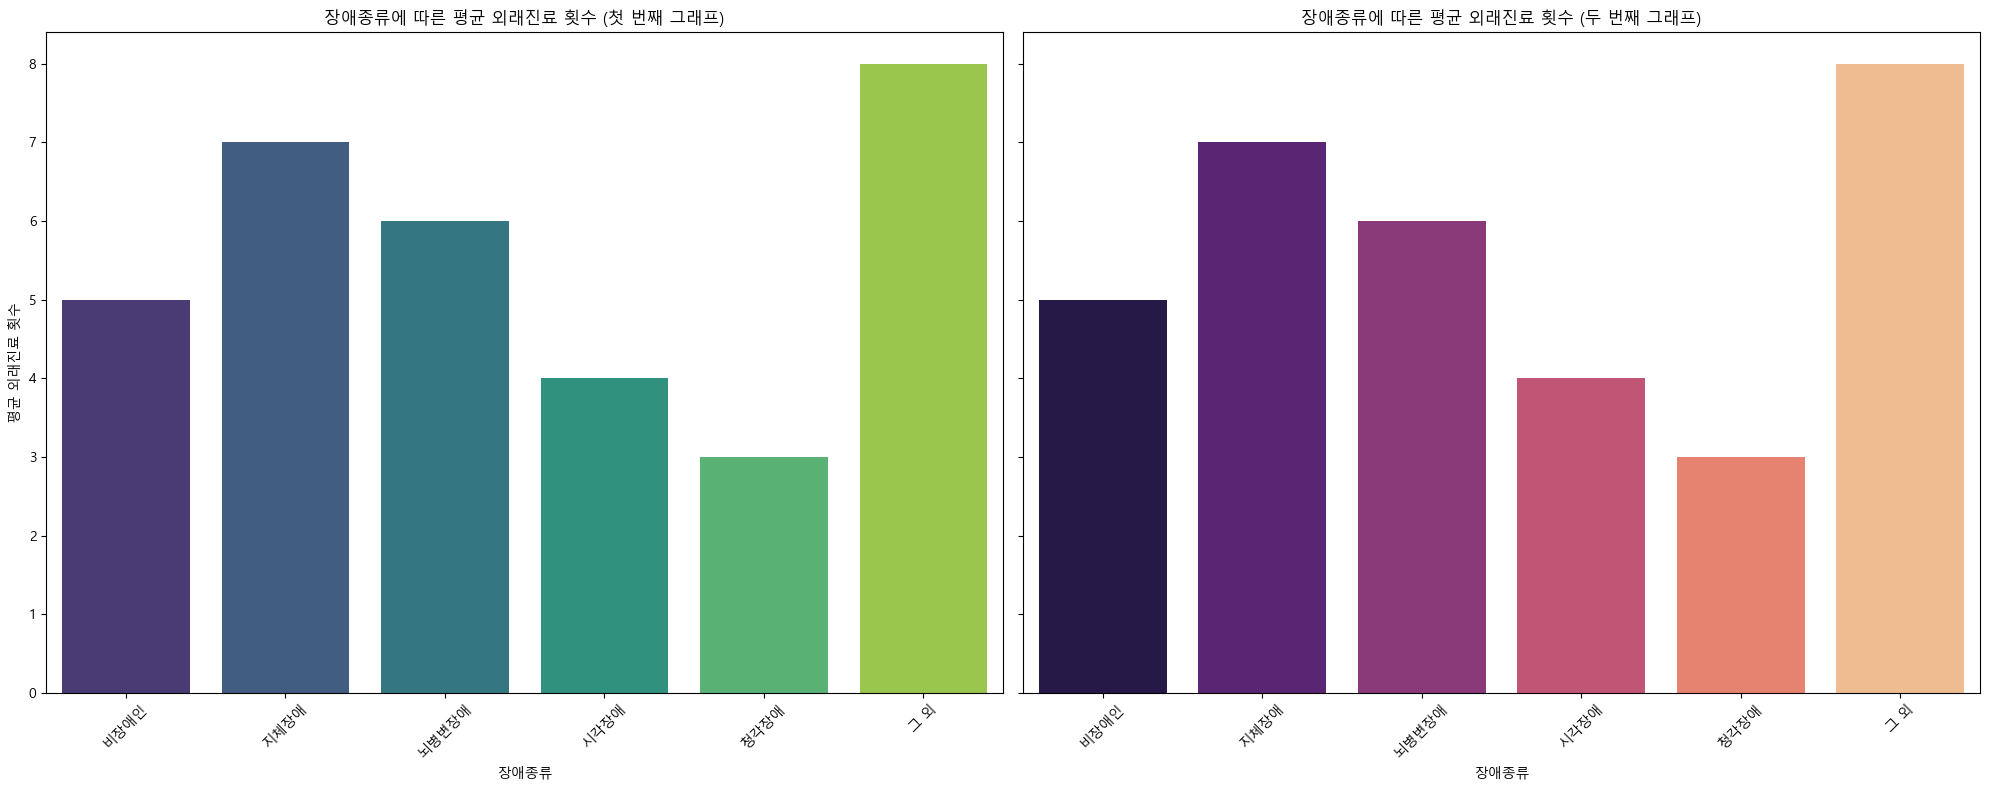

In [222]:
# 데이터프레임
data = {
    'disabled': ['비장애인', '지체장애', '뇌병변장애', '시각장애', '청각장애', '그 외']*10,
    'hospital_year': [5, 7, 6, 4, 3, 8]*10
}
welfare_19 = pd.DataFrame(data)

# 각 범주별 평균 계산
average_hospital_visits = welfare_19.groupby('disabled')['hospital_year'].mean().reset_index()

# 두 개의 그래프를 같은 플롯에 그리기
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 첫 번째 그래프
sns.barplot(data=average_hospital_visits, x='disabled', y='hospital_year', palette='viridis', order=['비장애인','지체장애','뇌병변장애','시각장애','청각장애','그 외'], ax=ax[0])
ax[0].set_title('장애종류에 따른 평균 외래진료 횟수 (첫 번째 그래프)')
ax[0].set_xlabel('장애종류')
ax[0].set_ylabel('평균 외래진료 횟수')
ax[0].tick_params(axis='x', rotation=45)  # x축 레이블을 읽기 쉽게 회전

# 두 번째 그래프 (같은 데이터로 다르게 표현할 수 있음)
sns.barplot(data=average_hospital_visits, x='disabled', y='hospital_year', palette='magma', order=['비장애인','지체장애','뇌병변장애','시각장애','청각장애','그 외'], ax=ax[1])
ax[1].set_title('장애종류에 따른 평균 외래진료 횟수 (두 번째 그래프)')
ax[1].set_xlabel('장애종류')
ax[1].set_ylabel('평균 외래진료 횟수')
ax[1].tick_params(axis='x', rotation=45)  # x축 레이블을 읽기 쉽게 회전

# 플롯 간 간격 조정
plt.tight_layout()
plt.show()



집에서 수정 시작

쉬었음 청년은 15~29세를 기준으로 하고 있는데, 15~25세는 학생이지 않나? 이들을 제외한 수치가 맞는지 확인 필요 / 예상은 15~25세는 학업이유가 많을 것 같음

In [227]:
# student: 25세이하, young: 26~29세, middle: 30~59세, old: 나머지

welfare=welfare.assign(ages=np.where(welfare['age']<=25, 'student',
                                     np.where(welfare['age']<30, 'young',
                                              np.where(welfare['age']<=59, 'middle','old'))))

In [228]:
# 비경제활동사유 항목에 이름 붙이기

welfare = welfare.assign(no_eWs=np.where(welfare['no_eW'] == 1, '근로무능력',
                                     np.where(welfare['no_eW'] == 2, '군복무',
                                         np.where(welfare['no_eW'] == 3, '학업',
                                            np.where(welfare['no_eW'] == 4, '진학준비',
                                               np.where(welfare['no_eW'] == 5, '취업준비',
                                                  np.where(welfare['no_eW'] == 6, '가사',
                                                     np.where(welfare['no_eW'] == 7, '양육',
                                                        np.where(welfare['no_eW'] == 8, '간병',
                                                           np.where(welfare['no_eW'] == 9, '구직활동포기',
                                                              np.where(welfare['no_eW'] == 10, '근로의사없음', '기타')
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)


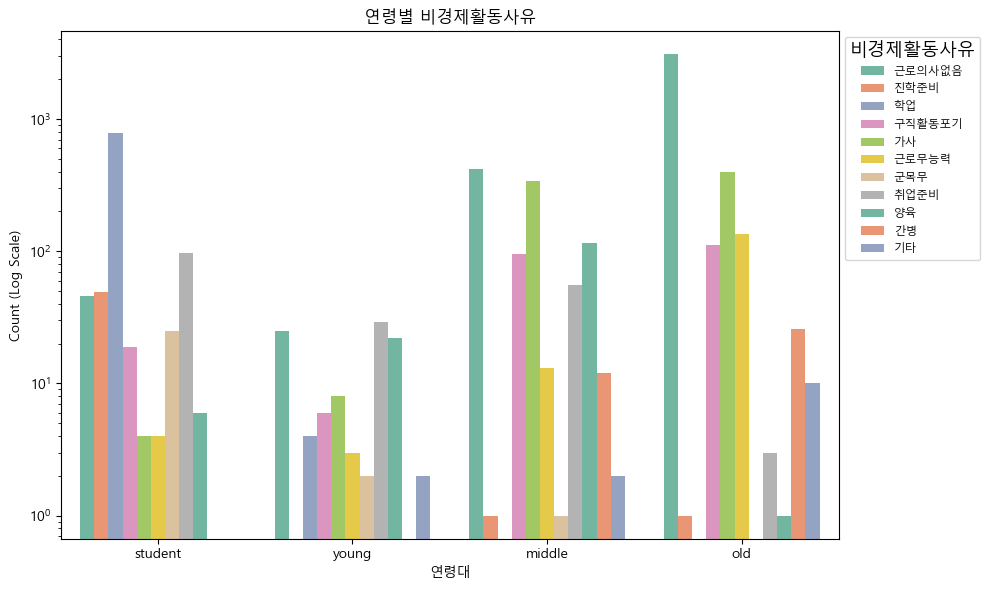

In [236]:
# 연령대에 따른 비경제활동사유
# x축 순서 설정
order = ['student', 'young', 'middle', 'old']

# seaborn을 사용하여 연령대별 비경제활동사유를 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=welfare, x='ages', hue='no_eWs', palette='Set2', order=order)

# y축을 로그 스케일로 변환 (낮은 수치도 잘 보이도록)
ax.set_yscale('log')

# 제목과 레이블 설정
plt.title('연령대별 비경제활동사유')
plt.xlabel('연령대')
plt.ylabel('Count (Log Scale)')

# 범례 설정: 글꼴 크기 조정
plt.legend(title='비경제활동사유', fontsize='small', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=0)
plt.tight_layout()  # 레이아웃 조정하여 범례가 잘리지 않도록 함
plt.show()

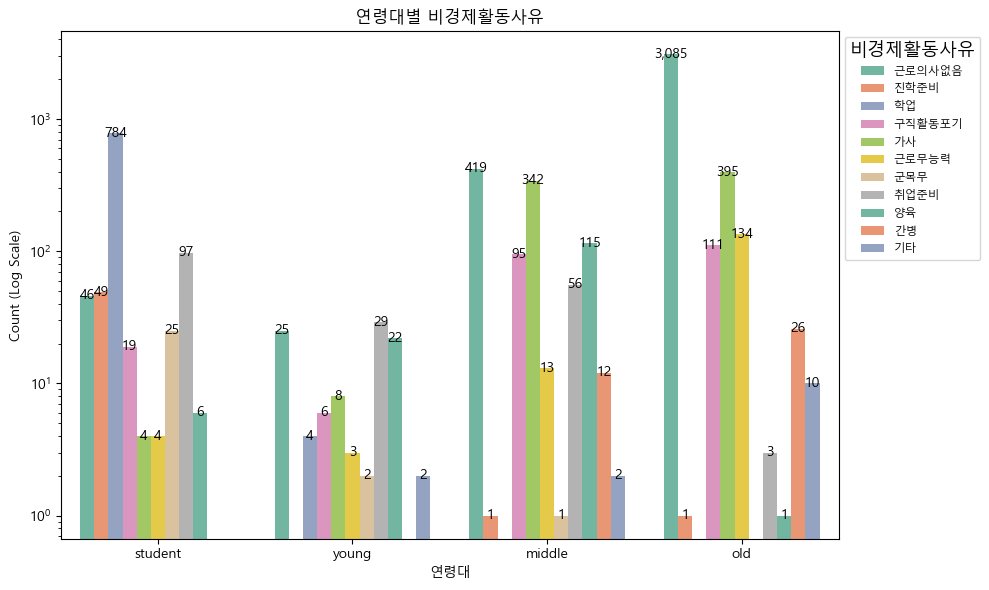

In [244]:
# x축 순서 설정
order = ['student', 'young', 'middle', 'old']

# seaborn을 사용하여 연령대별 비경제활동사유를 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=welfare, x='ages', hue='no_eWs', palette='Set2', order=order)

# y축을 로그 스케일로 변환 (낮은 수치도 잘 보이도록)
ax.set_yscale('log')

# 막대 위에 실제 수치 표시하기
for p in ax.patches:
    height = p.get_height()
    # 막대의 높이를 로그 스케일로 변환된 값을 이용하여 표시
    if height > 0:  # 0인 경우는 제외
        ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height):,}', ha="center", va="center", fontsize=10, color='black')

# 제목과 레이블 설정
plt.title('연령대별 비경제활동사유')
plt.xlabel('연령대')
plt.ylabel('Count (Log Scale)')

# 범례 설정: 글꼴 크기 조정
plt.legend(title='비경제활동사유', fontsize='small', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=0)
plt.tight_layout()  # 레이아웃 조정하여 범례가 잘리지 않도록 함
plt.show()
